In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Função para mostrar o Robo no gráfico

In [2]:
def drawRobot(x,y,q,s, color):
    p=np.zeros(36).reshape(12,3)
    p[0,:]=[1,1/7,1/s]
    p[1,:]=[-3/7,1,1/s]
    p[2,:]=[-5/7,6/7,1/s]
    p[3,:]=[-5/7,5/7,1/s]
    p[4,:]=[-3/7,2/7,1/s]
    p[5,:]=[-3/7,0,1/s]
    p[6,:]=[-3/7,-2/7,1/s]
    p[7,:]=[-5/7,-5/7,1/s]
    p[8,:]=[-5/7,-6/7,1/s]
    p[9,:]=[-3/7,-1,1/s]
    p[10,:]=[1,-1/7,1/s]
    p[11,:]=[1,1/7,1/s]
    #
    p=s*p
    #
    r=np.zeros(6).reshape(3,2)
    r[0,:]=[np.cos(q),np.sin(q)]
    r[1,:]=[-np.sin(q),np.cos(q)]
    r[2,:]=[x,y]
    #
    p=np.dot(p,r)
    X=p[:,0]
    Y=p[:,1]
    plt.plot(X,Y, color)

def plotRobot(x,y,q,s,color, step=2):
    for i in range(0, len(x), step):
        drawRobot(x[i],y[i],q[i],s, color)

## Importando os dados

In [4]:
Data_Aicardi = [pd.read_csv(f'Data/Data_Cena_{i}_Aicardi.csv') for i in range(1, 5)]
Data_Benbouabdallah = [pd.read_csv(f'Data/Data_Cena_{i}_Benbouabdallah.csv') for i in range(1, 5)]

## Mostrando as Trajetórias

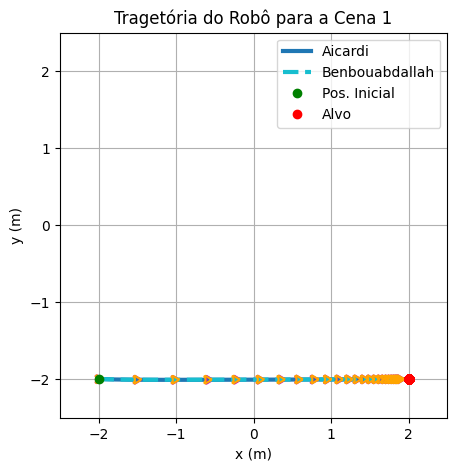

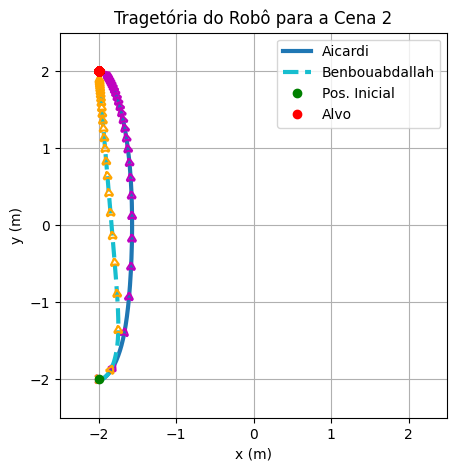

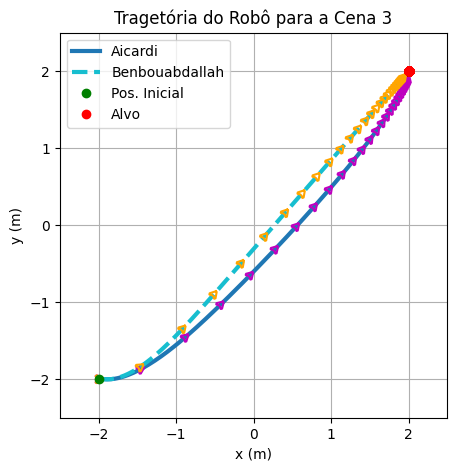

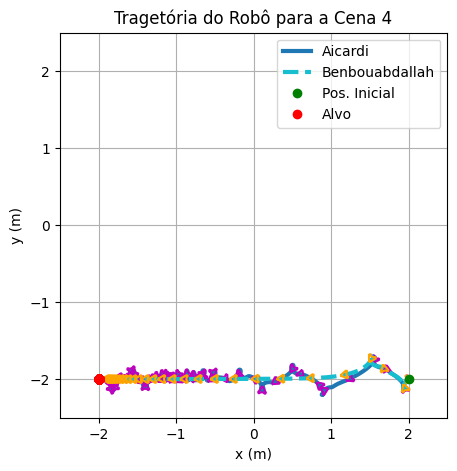

In [54]:
k = 1
for k in range(4):
    plt.figure(figsize=(5, 5))
    plt.title(f'Tragetória do Robô para a Cena {k + 1}')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.plot(Data_Aicardi[k]['x'], Data_Aicardi[k]['y'], label='Aicardi', linewidth=3, color='tab:blue')
    plotRobot(Data_Aicardi[k]['x'], Data_Aicardi[k]['y'], Data_Aicardi[k]['phi'], 0.05, 'm-', 30)
    plt.plot(Data_Benbouabdallah[k]['x'], Data_Benbouabdallah[k]['y'], label='Benbouabdallah', linewidth=3, color = 'tab:cyan', linestyle='--')
    plotRobot(Data_Benbouabdallah[k]['x'], Data_Benbouabdallah[k]['y'], Data_Benbouabdallah[k]['theta'], 0.05, 'orange', 30)
    plt.plot(Data_Aicardi[k]['x'][0], Data_Aicardi[k]['y'][0], 'go', label='Pos. Inicial')
    plt.plot(Data_Aicardi[k]['xg'], Data_Aicardi[k]['yg'], 'ro', label='Alvo')
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.grid()
    plt.legend()
    plt.show(block=False)

## Mostrando as variaveis de controle

<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Matheus Lucas\AppData\Local\Temp\ipykernel_14776\2298820088.py:14: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_ylabel('Velocidade Angular $\omega$ (rad/s)', color='tab:red')
C:\Users\Matheus Lucas\AppData\Local\Temp\ipykernel_14776\2298820088.py:15: SyntaxWarning: invalid escape sequence '\o'
  ax2.plot(Data_Aicardi[k]['t'], Data_Aicardi[k]['w'], label='$\omega$ - Aicardi', color='tab:red', linewidth=3)
C:\Users\Matheus Lucas\AppData\Local\Temp\ipykernel_14776\2298820088.py:16: SyntaxWarning: invalid escape sequence '\o'
  ax2.plot(Data_Benbouabdallah[k]['t'], Data_Benbouabdallah[k]['w'], label='$\omega$ - Benbouabdallah', color='tab:pink', linestyle='--', linewidth=

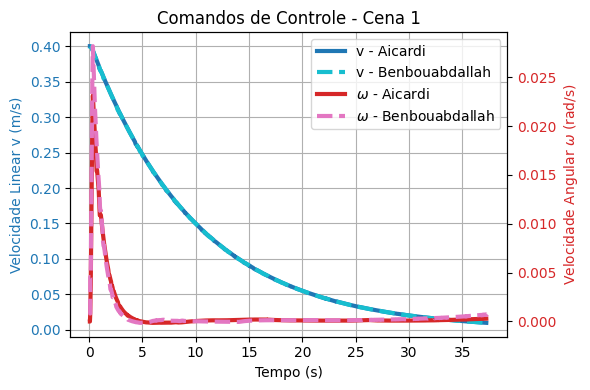

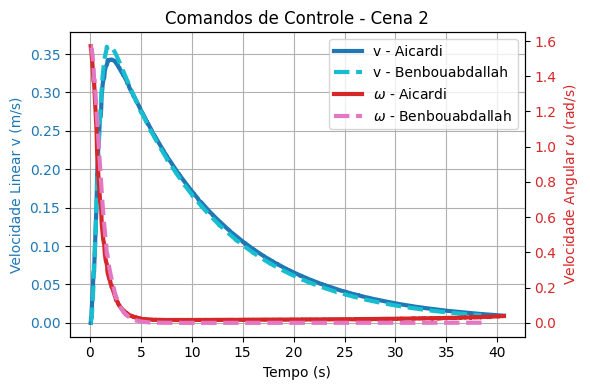

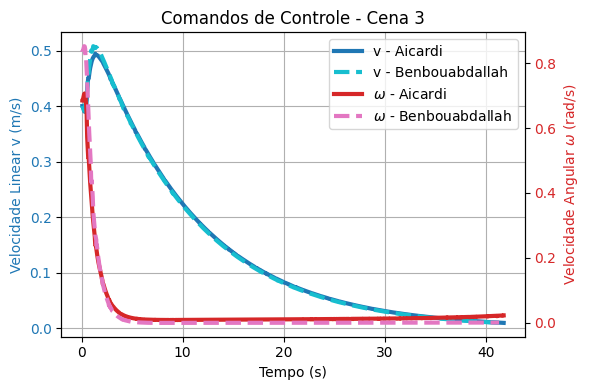

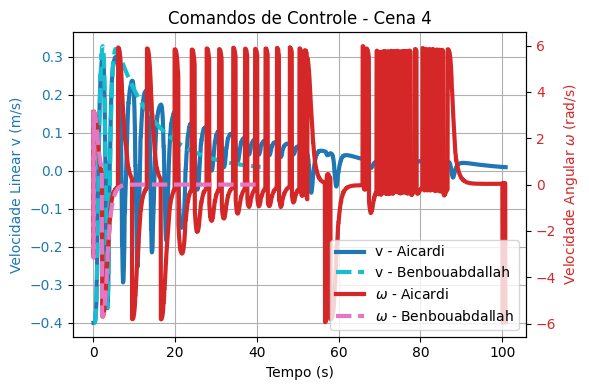

In [51]:
for k in range(4):
    fig, ax1 = plt.subplots(figsize=(6, 4))
    ax1.set_title(f'Comandos de Controle - Cena {k + 1}')
    ax1.set_xlabel('Tempo (s)')

    # Eixo Y1 - u (velocidade linear)
    ax1.set_ylabel('Velocidade Linear v (m/s)', color='tab:blue')
    ax1.plot(Data_Aicardi[k]['t'], Data_Aicardi[k]['v'], label='v - Aicardi', color='tab:blue', linewidth=3)
    ax1.plot(Data_Benbouabdallah[k]['t'], Data_Benbouabdallah[k]['v'], label='v - Benbouabdallah', color='tab:cyan', linestyle='--', linewidth=3)
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Eixo Y2 - w (velocidade angular)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Velocidade Angular $\omega$ (rad/s)', color='tab:red')
    ax2.plot(Data_Aicardi[k]['t'], Data_Aicardi[k]['w'], label='$\omega$ - Aicardi', color='tab:red', linewidth=3)
    ax2.plot(Data_Benbouabdallah[k]['t'], Data_Benbouabdallah[k]['w'], label='$\omega$ - Benbouabdallah', color='tab:pink', linestyle='--', linewidth=3)
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Combinar legendas dos dois eixos
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='best')

    ax1.grid()
    fig.tight_layout()
    plt.show(block=False)


## Mostrando o erro de posição Robô-Alvo

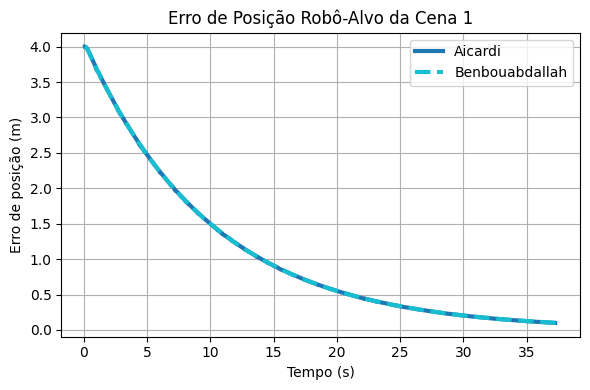

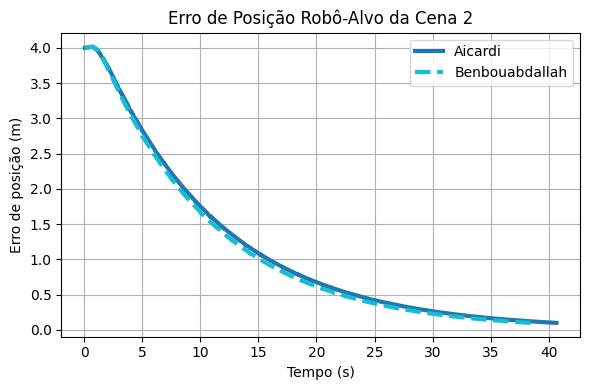

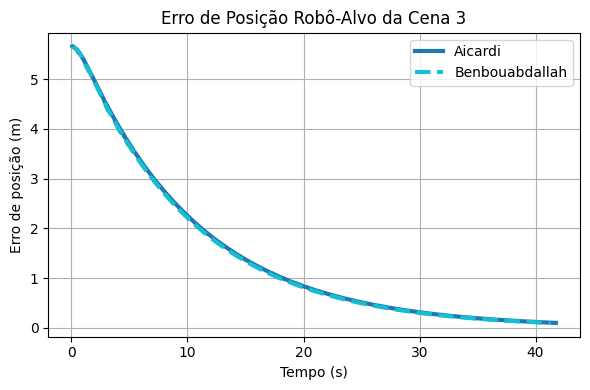

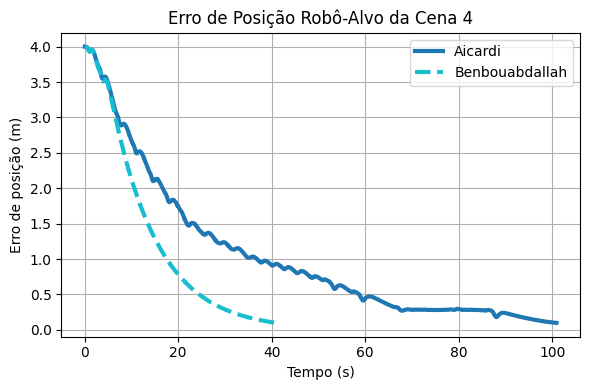

In [41]:
for k in range(4):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_title(f'Erro de Posição Robô-Alvo da Cena {k + 1}')
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Erro de posição (m)')

    # Curvas
    ax.plot(Data_Aicardi[k]['t'], Data_Aicardi[k]['e'], label='Aicardi', color='tab:blue', linewidth=3)
    ax.plot(Data_Benbouabdallah[k]['t'], Data_Benbouabdallah[k]['D'], label='Benbouabdallah', color='tab:cyan', linestyle='--', linewidth=3)

    # Grid, legenda, layout
    ax.grid(True)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show(block=False)


## Mostrando o erro de orientação Robô-Alvo

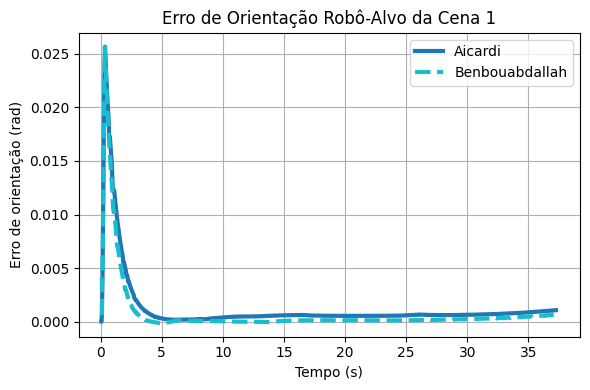

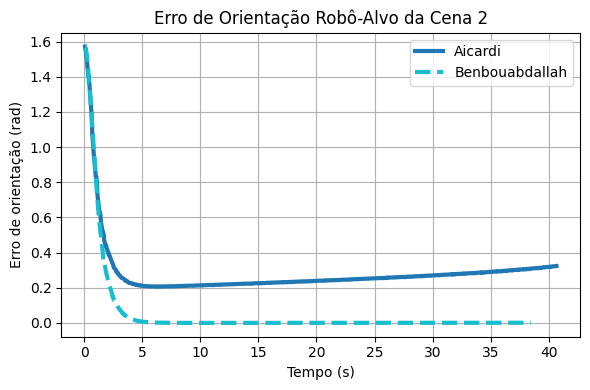

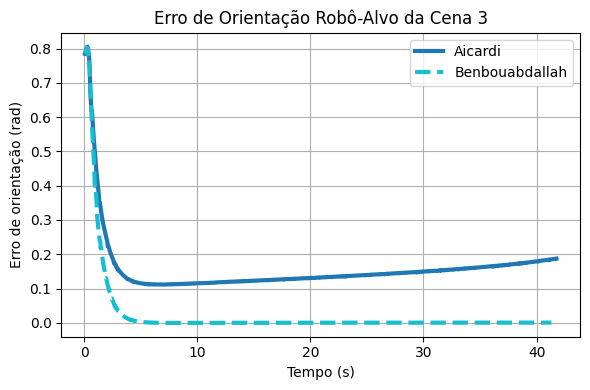

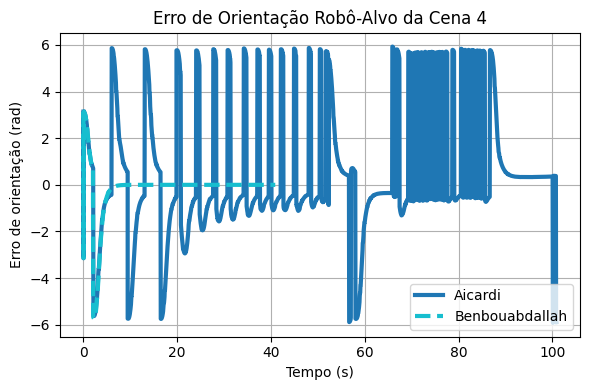

In [32]:
for k in range(4):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_title(f'Erro de Orientação Robô-Alvo da Cena {k + 1}')
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Erro de orientação (rad)')

    # Curvas
    ax.plot(Data_Aicardi[k]['t'], Data_Aicardi[k]['alpha'], label='Aicardi', color='tab:blue', linewidth=3)
    ax.plot(Data_Benbouabdallah[k]['t'], -Data_Benbouabdallah[k]['alpha'], label='Benbouabdallah', color='tab:cyan', linestyle='--', linewidth=3)

    # Grid, legenda, layout
    ax.grid(True)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show(block=False)
